In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import svm
from sklearn.utils.validation import column_or_1d

soybean_data = pd.read_csv('data/data.csv')
# X = soybean_data.drop(columns=['Cultivar'])
# y = soybean_data['Cultivar']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=46)

# C=pow(2,5)
# clf= svm.SVC(kernel='linear',C=C)
# clf.fit(X_train, y_train)
# predictie = clf.predict(X_test)

# acuratete=accuracy_score(y_test, predictie)
# acuratete

# model = DecisionTreeClassifier()
# model.fit(X, y)

# tree.export_graphviz(model, out_file='soybean_prediction.dot',
#                     feature_names=['Season', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'],
#                     class_names=sorted(y.unique()),
#                     label='all',
#                     rounded=True,
#                     filled=True)

# model = joblib.load('soybean-predictor.joblib')
# prediction = model.predict( [[2, 5, 62.50, 15.80, 44.32, 93.84, 1.95, 3.79, 200.86, 3204.930000]] )
# prediction
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

# score = accuracy_score(y_test, predictions)
# score

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,0,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,0,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,0,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,38,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,39,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,39,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,39,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [23]:
soybean_data = pd.read_csv('data/data.csv')
soybean_data

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [ ]:
dictionary = {}
n = 0

for column in soybean_data.select_dtypes(include=['object']):
    unique_values = soybean_data[column].unique()
    for value in unique_values:
        if value not in dictionary:
            dictionary[value] = n
            n += 1

    soybean_data[column] = soybean_data[column].map(dictionary)
    
soybean_data.to_csv('data_processed.csv', index=False)

In [21]:
df = pd.read_csv('data_processed.csv')
df

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,0,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,0,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,0,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,38,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,39,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,39,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,39,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


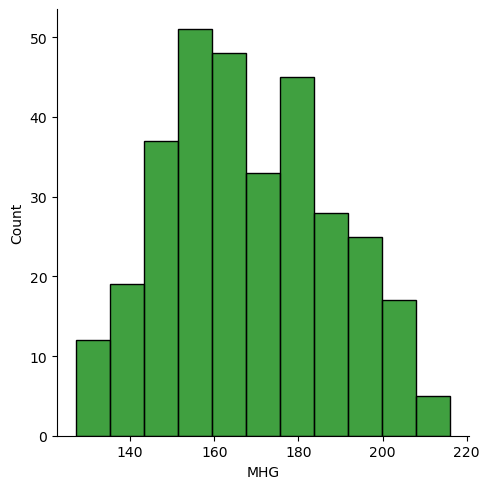

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = pd.read_csv("data_processed.csv")
  
# Histogram+Density Plot 
sns.displot(dataset["MHG"], color = "green")
plt.show()
plt.figure()

In [7]:
dataset.groupby('Cultivar').mean().sort_values(by="MHG", ascending=False)

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
Cultivar,,,,,,,,,,
30,1.5,2.5,61.30000,14.33375,44.13375,100.13375,2.26500,2.76625,204.08125,3157.961164
10,1.5,2.5,77.56625,17.90000,84.16625,169.60000,2.19000,6.36625,197.25250,3205.204109
9,1.5,2.5,61.96750,16.36750,49.60000,104.20000,2.08250,3.36625,197.17500,3544.989109
6,1.5,2.5,73.03375,15.03375,53.66750,148.23375,2.14750,3.96625,194.17250,3140.346451
11,1.5,2.5,62.50000,14.50000,94.13250,202.30000,2.27125,5.43375,193.90875,3600.278290
33,1.5,2.5,61.50000,16.06625,56.70000,121.23375,2.15500,3.60000,189.82500,3228.574698
8,1.5,2.5,81.33375,19.33375,54.06625,134.93375,2.25875,4.23250,188.86875,3949.030876
26,1.5,2.5,66.03250,12.60000,63.20000,151.66625,2.40750,3.90000,188.65000,3527.056063
3,1.5,2.5,63.86625,13.43250,60.23250,258.13250,4.49000,4.96750,187.92250,3809.043908


<AxesSubplot:title={'center':'MHG[g]'}, ylabel='Frequency'>

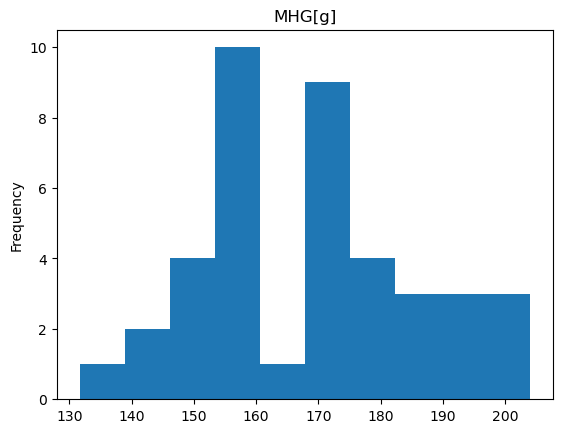

In [15]:
df2 = dataset.groupby('Cultivar').mean()
df2['MHG'].plot(kind='hist', title='MHG[g]')

<AxesSubplot:title={'center':'MHG[g]'}, ylabel='Density'>

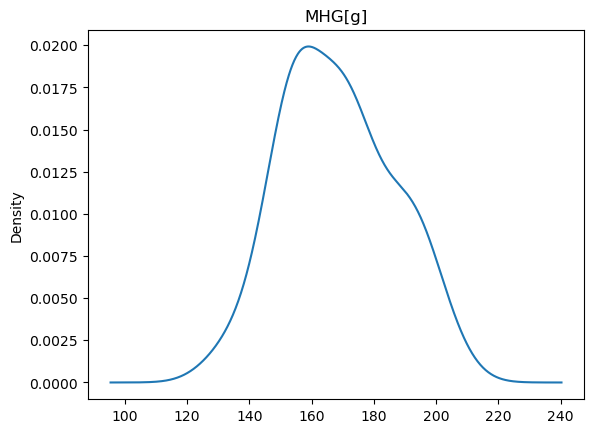

In [17]:
df2['MHG'].plot(kind='kde', title='MHG[g]')

<AxesSubplot:title={'center':'GY[kg/ha]'}, ylabel='Frequency'>

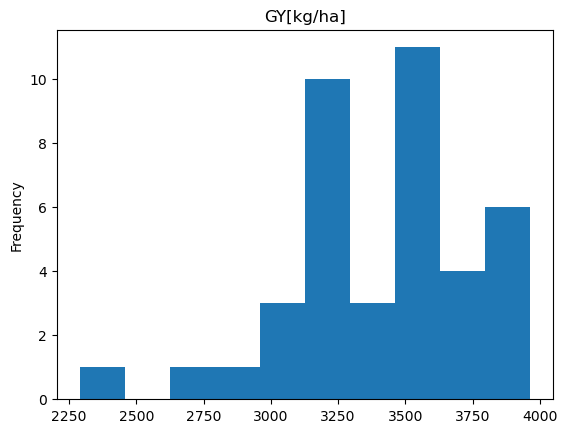

In [16]:
df2['GY'].plot(kind='hist', title='GY[kg/ha]')

<AxesSubplot:xlabel='MHG', ylabel='Season'>

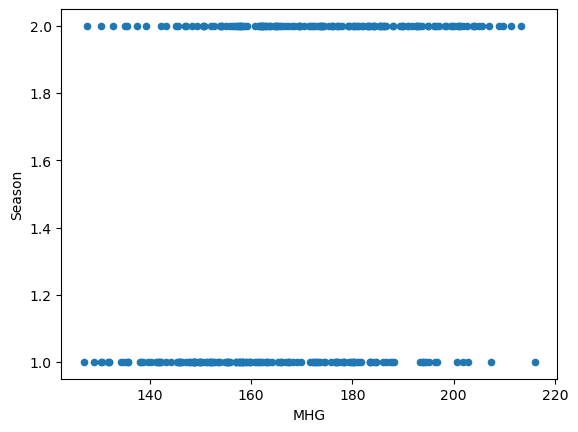

In [26]:
df = pd.read_csv('data_processed.csv')
df.plot(kind='scatter', x='MHG', y='Season')

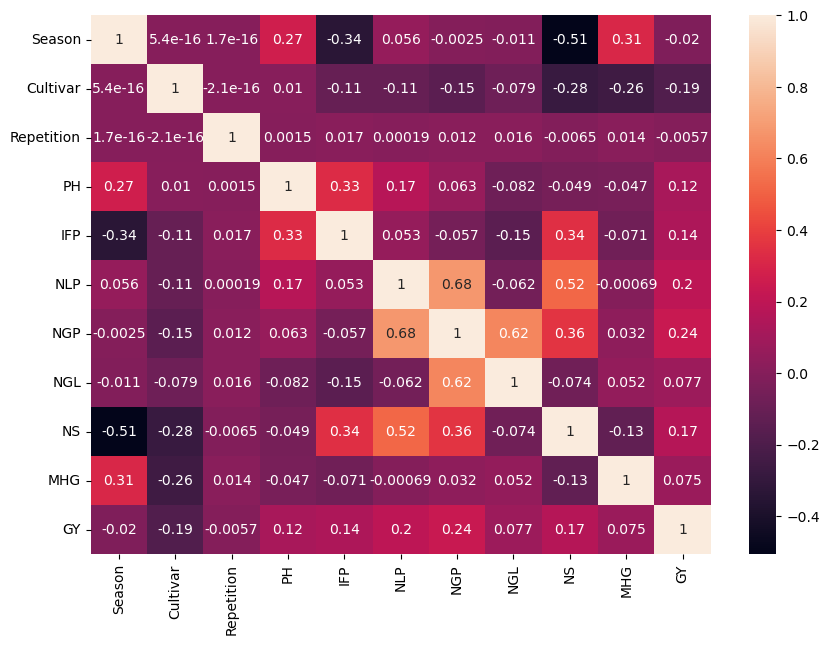

In [37]:
sns.heatmap(df.corr(), annot=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()